In [ ]:
# !pip install PyNomaly
# !pip install opencv-python
#!pip install pyod
# !pip install anomalib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyod.models.lof import LOF
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data, evaluate_print
from pyod.utils.example import visualize

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, precision_score

from sklearn.model_selection import train_test_split
sns.set_style("darkgrid")

# Sample  Data for Better Understanding

Isolation Forest

In [ ]:
df = pd.DataFrame({'Marks':[56,57,58,65,68,69,100]})
df

,Marks
0,56
1,57
2,58
3,65
4,68
5,69
6,100


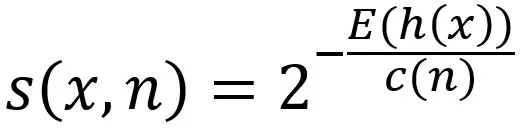


h(x) represents the path of a given data point

E(h(x)) represents the average path length of the data point across multiple trees in the Isolation Forest.

c is a scaling factor or constant term.

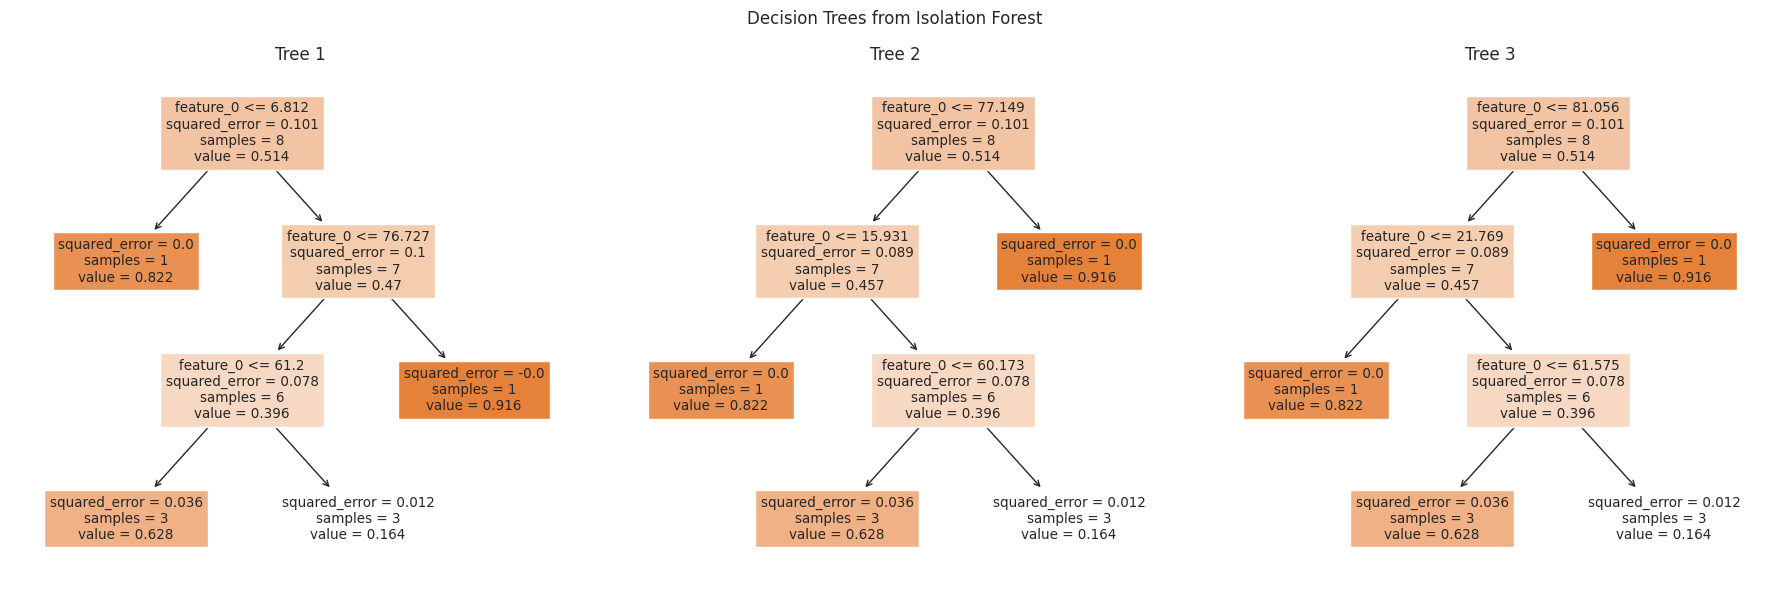

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import IsolationForest
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Generating sample data
X = df[['Marks']]

# Creating an Isolation Forest with 1 tree for demonstration
isolation_forest = IsolationForest(n_estimators=3)
isolation_forest.fit(X)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Decision Trees from Isolation Forest')

# Plotting each tree in a separate subplot
for i, tree in enumerate(isolation_forest.estimators_):
    plt.subplot(1, 3, i + 1)
    plot_tree(tree, max_depth=3, feature_names=[f"feature_{i}" for i in range(10)], filled=True)
    plt.title(f"Tree {i + 1}")

plt.tight_layout()
plt.show()

#Formula: anomaly score = return 2 ** (-avg_path_length / (np.log(2) * self.max_depth))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


[-0.09906408 -0.14621836 -0.12378813 -0.12145101 -0.1580319  -0.12954537
  0.14859612] 8.326672684688674e-17


<Axes: >

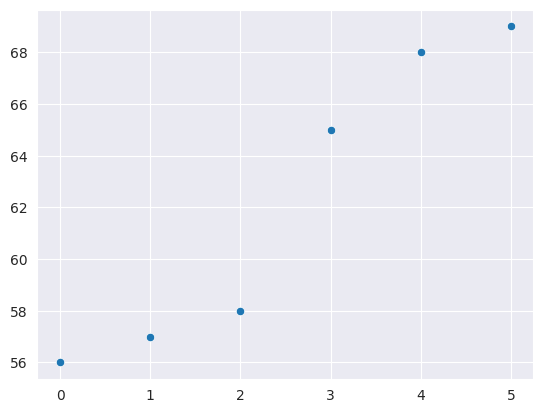

In [ ]:
X= df[['Marks']]
model = IForest()
model.fit(X)
anomaly_scores = model.decision_function(X)
threshold = model.threshold_
print(anomaly_scores,threshold)
outlier = np.where(anomaly_scores > threshold)[0]
data_no_outlier = np.delete(df['Marks'].to_numpy(), outlier)
sns.scatterplot(data_no_outlier)



tree::: ExtraTreeRegressor(max_depth=3, max_features=1, random_state=1952926171)


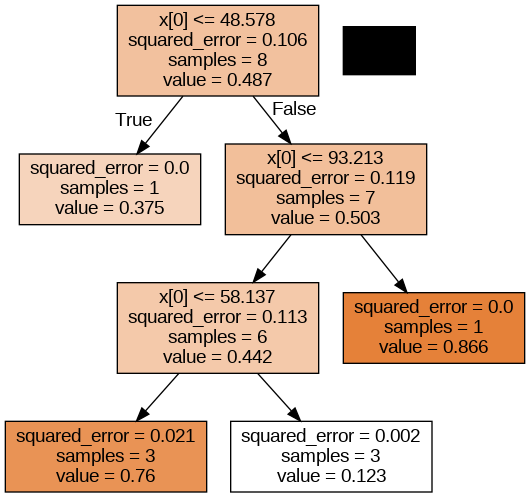

In [ ]:
#To make single Tree
from pyod.models.iforest import IForest
from sklearn.datasets import make_blobs
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

# Generate synthetic data
# X, _ = make_blobs(n_samples=100, centers=1, random_state=42)
# print('XX:::',X)
X = df[['Marks']]
# Initialize Isolation Forest from PyOD
clf = IForest(n_estimators=1, random_state=42,)  # Using only 1 tree for visualization

# Fit the model
clf.fit(X)

# Get the tree
tree = clf.estimators_[0]
print('tree:::',tree)
# Export the tree as DOT file
export_graphviz(tree, out_file='isolation_tree.dot', filled=True)

# Convert DOT to PNG
(graph,) = pydot.graph_from_dot_file('isolation_tree.dot')
graph.write_png('isolation_tree.png')

# Display the tree (optional)
Image(filename='isolation_tree.png')


#KNN

Euclidean distance Formula

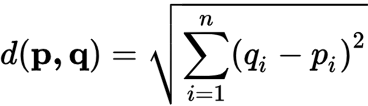

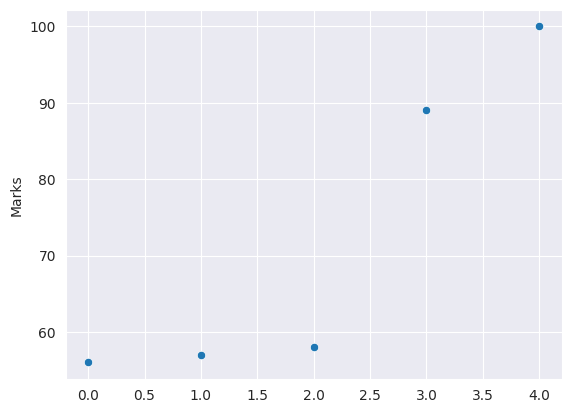

In [ ]:
df = pd.DataFrame({'Marks': [56, 57, 58, 89,100]})

sns.scatterplot(df['Marks'])

# Convert DataFrame to a NumPy array
X = df['Marks'].values.reshape(-1, 1)



In [ ]:
# Define the K value for KNN
K = 3

# Function to calculate Euclidean distance between two points
def euclidean_distance(a, b):
    print(f'a:{a}, b: {b}, Euclidean distance: {np.sqrt(np.sum((a - b) ** 2))}')
    return np.sqrt(np.sum((a - b) ** 2))

# Calculate pairwise distances
distances = np.zeros((len(X), len(X)))
for i in range(len(X)):
    for j in range(len(X)):
        distances[i, j] = euclidean_distance(X[i], X[j])
print('Distances:::',distances)

# Find K-nearest neighbors for each point
nearest_neighbors = []
for i in range(len(X)):
    indices = np.argsort(distances[i])[1:K+1]  # Exclude the point itself by starting from index 1
    nearest_neighbors.append(indices)
print('nearest_neighbors::::',nearest_neighbors)


# Calculate anomaly scores based on average distance to K-nearest neighbors
anomaly_scores = []
for i in range(len(X)):
    avg_distance = np.mean(distances[i, nearest_neighbors[i]])
    print('NN:::',nearest_neighbors[i], distances[i], distances[i, nearest_neighbors[i]], avg_distance)
    anomaly_scores.append(avg_distance)

# Set a threshold for anomaly detection
threshold = 15  # Adjust this based on your dataset and requirements

# Identify anomalies based on the threshold
anomalies = [i for i, score in enumerate(anomaly_scores) if score > threshold]

# Display the anomaly scores and detected anomalies
df['AnomalyScore'] = anomaly_scores
print("Anomaly Scores:")
print(df)

print("\nDetected Anomalies:")
print(df.iloc[anomalies])

a:[56], b: [56], Euclidean distance: 0.0
a:[56], b: [57], Euclidean distance: 1.0
a:[56], b: [58], Euclidean distance: 2.0
a:[56], b: [89], Euclidean distance: 33.0
a:[56], b: [100], Euclidean distance: 44.0
a:[57], b: [56], Euclidean distance: 1.0
a:[57], b: [57], Euclidean distance: 0.0
a:[57], b: [58], Euclidean distance: 1.0
a:[57], b: [89], Euclidean distance: 32.0
a:[57], b: [100], Euclidean distance: 43.0
a:[58], b: [56], Euclidean distance: 2.0
a:[58], b: [57], Euclidean distance: 1.0
a:[58], b: [58], Euclidean distance: 0.0
a:[58], b: [89], Euclidean distance: 31.0
a:[58], b: [100], Euclidean distance: 42.0
a:[89], b: [56], Euclidean distance: 33.0
a:[89], b: [57], Euclidean distance: 32.0
a:[89], b: [58], Euclidean distance: 31.0
a:[89], b: [89], Euclidean distance: 0.0
a:[89], b: [100], Euclidean distance: 11.0
a:[100], b: [56], Euclidean distance: 44.0
a:[100], b: [57], Euclidean distance: 43.0
a:[100], b: [58], Euclidean distance: 42.0
a:[100], b: [89], Euclidean distance: